In [1]:
import pandas as pd
import pkg_acs_analysis as acs
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [40]:
df = acs.parse_group(2008,2018)
test = acs.preprocess_catagories(test)
test2["WAGP"] = [np.exp(x) for x in test2["WAGP"]]

In [46]:
test2.to_csv('data_output/raw_preprecessed_full_df.csv')

In [52]:
test2

,SEX,WAGP,year,AGE,EDU,JOB,RACE,DIV
0,Male,57000.0,2008,37-45,M.S._Degree,Science,Asian,East South Central
1,Male,75000.0,2008,29-36,M.S._Degree,Business,White,East South Central
2,Female,50000.0,2008,29-36,B.S._Degree,Business,White,East South Central
3,Female,50000.0,2008,37-45,Some_College,Healthcare,Black,East South Central
4,Female,25500.0,2008,46-55,Highschool,Sales,White,East South Central
...,...,...,...,...,...,...,...,...
10540136,Female,43000.0,2018,37-45,B.S._Degree,Business,White,Mountain
10540137,Female,17000.0,2018,56-70,Some_College,Production,White,Mountain
10540138,Male,42100.0,2018,37-45,Some_College,Sales,White,Mountain
10540139,Female,47500.0,2018,29-36,B.S._Degree,Art,White,Mountain


In [55]:
def average_var_wages(df):
    full_df = pd.DataFrame()
    var_list = ['SEX', 'DIV', 'AGE', 'EDU', 'JOB', 'RACE']
    for var in var_list:
        avg = df[[var,'WAGP', 'year']].groupby([var, 'year']).agg('mean').reset_index()
        avg = avg.rename({var: 'cat'}, axis=1)
        avg['var'] = var
        full_df = full_df.append(avg)
    return full_df

In [57]:
org_df = average_var_wages(test2)

In [59]:
org_df

,cat,year,WAGP,var
0,Female,2008,44752.198842,SEX
1,Female,2009,46123.488959,SEX
2,Female,2010,47082.109737,SEX
3,Female,2011,47434.175495,SEX
4,Female,2012,48183.619120,SEX
...,...,...,...,...
61,White,2014,61850.850181,RACE
62,White,2015,62611.891182,RACE
63,White,2016,63242.584035,RACE
64,White,2017,64896.174621,RACE


In [60]:
def graph_var(df, var):
    df_var = df[df['var'] == var]
    sns.lineplot(data=df_var, x="year", y='WAGP', hue='cat')

In [76]:
df_f = org_df[org_df['cat'] == 'Female']
df_m = org_df[org_df['cat'] == 'Male']
df_sex = pd.merge(df_f, df_m, on='year')
df_sex['perc'] = df_sex['WAGP_x'] / df_sex['WAGP_y']

In [77]:
df_sex

,cat_x,year,WAGP_x,var_x,cat_y,WAGP_y,var_y,perc
0,Female,2008,44752.198842,SEX,Male,59618.758239,SEX,0.750640
1,Female,2009,46123.488959,SEX,Male,62031.168228,SEX,0.743553
2,Female,2010,47082.109737,SEX,Male,63293.575882,SEX,0.743869
3,Female,2011,47434.175495,SEX,Male,63413.000928,SEX,0.748020
4,Female,2012,48183.619120,SEX,Male,63547.250224,SEX,0.758233
5,Female,2013,49336.388615,SEX,Male,64291.973991,SEX,0.767380
6,Female,2014,50012.996467,SEX,Male,64504.591519,SEX,0.775340
7,Female,2015,50962.654513,SEX,Male,65036.926539,SEX,0.783596
8,Female,2016,52058.124673,SEX,Male,65535.081799,SEX,0.794355
9,Female,2017,53500.977303,SEX,Male,67161.814126,SEX,0.796598


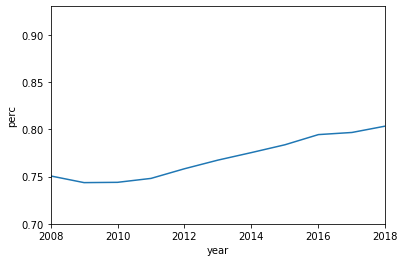

In [79]:
p = sns.lineplot(data=df_sex, x="year", y='perc')
p.set(xlim=(2008, 2018), ylim=(0.70, 0.93))
plt.show()

In [3]:
yearly_sex_sep = pd.read_csv('data_output\yearly_sex_sep.csv')
yearly_sex_full = pd.read_csv('data_output\yearly_sex_full.csv')
yearly_cat_full = pd.read_csv('data_output\yearly_cat_full.csv')
yearly_group_df = pd.read_csv('data_output\yearly_group_df.csv')

In [13]:
split = yearly_sex_full[["Variable", "Category", "Year", "F_M_Ratio_Avg", "F_Pct_Ct"]]
years = [2008, 2018]
split = split[split["Year"].isin(years)]
split.to_csv("data_output\ext_visual\connected_dot_plot.csv")

In [23]:
split = pd.read_csv("data_output\ext_visual\connected_dot_plot.csv")
split2 = pd.merge(split[split["Year"] == 2018], split[split["Year"]==2008], on=["Variable", "Category"])
split2.to_csv("data_output\ext_visual\connected_dot_plot2.csv")


In [32]:
yearly_m = yearly_group_df[yearly_group_df['SEX'] == 'Male']
yearly_f = yearly_group_df[yearly_group_df['SEX'] == 'Female']
yearly = pd.merge(yearly_m, yearly_f, on=["AGE", "EDU", "JOB", "RACE", "DIV", "Year"])

yearly = yearly[["AGE", "EDU", "JOB", "RACE", "DIV", "Year", "WAGP_count_x", "WAG_x", "WAGP_count_y", "WAG_y"]]

yearly["percent"] = yearly["WAG_y"] / yearly["WAG_x"]
yearly["total_ct"] = yearly["WAGP_count_x"] + yearly["WAGP_count_y"]
yearly["weight_per"] = yearly["percent"] * yearly["total_ct"]

In [33]:
yearly

,AGE,EDU,JOB,RACE,DIV,Year,WAGP_count_x,WAG_x,WAGP_count_y,WAG_y,percent,total_ct,weight_per
0,18-22,B.S._Degree,Art,Asian,East North Central,2008,0,31480.638283,2,25996.423392,0.825791,2,1.651582
1,18-22,B.S._Degree,Art,Asian,East South Central,2008,0,30072.090668,0,25507.354244,0.848207,0,0.000000
2,18-22,B.S._Degree,Art,Asian,Middle Atlantic,2008,0,31527.532291,2,28053.725249,0.889817,2,1.779633
3,18-22,B.S._Degree,Art,Asian,Mountain,2008,0,31008.301256,0,25470.128421,0.821397,0,0.000000
4,18-22,B.S._Degree,Art,Asian,New England,2008,1,30810.231341,2,25559.412351,0.829575,3,2.488726
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213835,56-70,Some_College,Transport,White,New England,2018,121,52732.615971,25,33819.939058,0.641348,146,93.636756
213836,56-70,Some_College,Transport,White,Pacific,2018,355,49703.599444,84,43418.755308,0.873554,439,383.490005
213837,56-70,Some_College,Transport,White,South Atlantic,2018,422,45895.653696,97,29948.416521,0.652533,519,338.664490
213838,56-70,Some_College,Transport,White,West North Central,2018,371,44728.918833,71,36101.688920,0.807122,442,356.747870


In [27]:
avg = df[[var, "Year", "weight_per", "total_ct"]]
avg = avg.groupby([var, 'Year']).agg('sum').reset_index()
avg = avg.rename({var: 'cat'}, axis=1)
avg['var'] = var
avg["total_percent"] = avg["weight_per"] / avg["total_ct"]
full_df = full_df.append(avg)

edu_df 

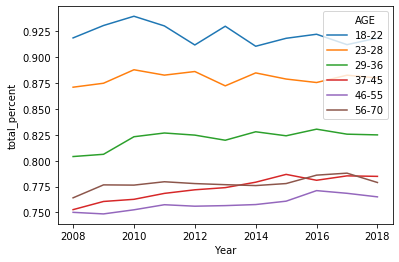

In [29]:
sns.lineplot(data=edu_df, x="Year", y="total_percent", hue="AGE")

In [16]:
yearly2

,AGE,EDU,JOB,RACE,DIV,Year,WAGP_count_x,WAG_x,WAGP_count_y,WAG_y,percent,total_ct
0,18-22,B.S._Degree,Art,Asian,East North Central,2008,0,31480.638283,2,25996.423392,0.825791,2
1,18-22,B.S._Degree,Art,Asian,East South Central,2008,0,30072.090668,0,25507.354244,0.848207,0
2,18-22,B.S._Degree,Art,Asian,Middle Atlantic,2008,0,31527.532291,2,28053.725249,0.889817,2
3,18-22,B.S._Degree,Art,Asian,Mountain,2008,0,31008.301256,0,25470.128421,0.821397,0
4,18-22,B.S._Degree,Art,Asian,New England,2008,1,30810.231341,2,25559.412351,0.829575,3
...,...,...,...,...,...,...,...,...,...,...,...,...
213835,56-70,Some_College,Transport,White,New England,2018,121,52732.615971,25,33819.939058,0.641348,146
213836,56-70,Some_College,Transport,White,Pacific,2018,355,49703.599444,84,43418.755308,0.873554,439
213837,56-70,Some_College,Transport,White,South Atlantic,2018,422,45895.653696,97,29948.416521,0.652533,519
213838,56-70,Some_College,Transport,White,West North Central,2018,371,44728.918833,71,36101.688920,0.807122,442


In [22]:
def average_var_per(df):
    full_df = pd.DataFrame()
    var_list = ['DIV', 'AGE', 'EDU', 'JOB', 'RACE']
    for var in var_list:
        avg = df[[var,'per', 'Year']].groupby([var, 'Year']).agg('mean').reset_index()
        avg = avg.rename({var: 'cat'}, axis=1)
        avg['var'] = var
        full_df = full_df.append(avg)
    return full_df

graphable = average_var_per(yearly2)
graphable

,cat,Year,per,var
0,East North Central,2008,0.863336,DIV
1,East North Central,2009,0.852587,DIV
2,East North Central,2010,0.873845,DIV
3,East North Central,2011,0.887297,DIV
4,East North Central,2012,0.865932,DIV
...,...,...,...,...
61,White,2014,0.824827,RACE
62,White,2015,0.808890,RACE
63,White,2016,0.820649,RACE
64,White,2017,0.839433,RACE


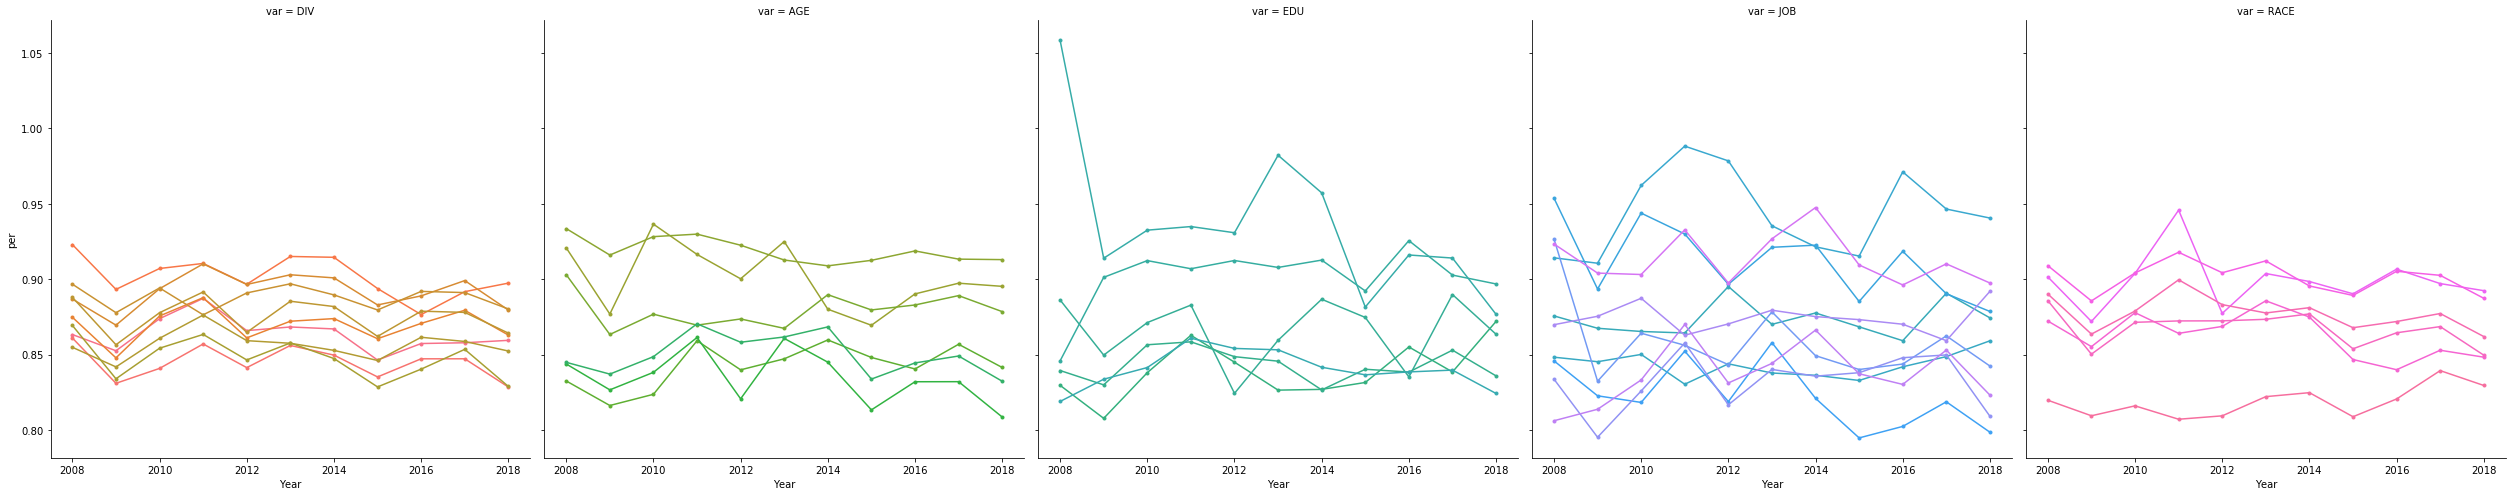

In [28]:
g = sns.FacetGrid(graphable, col="var", hue="cat", col_wrap=5, height=7)
g = g.map(plt.plot, "Year", "per", marker=".")

In [14]:
yearly2

,AGE,EDU,JOB,RACE,DIV,Year,WAGP_count_x,WAG_x,WAGP_count_y,WAG_y,per
0,18-22,B.S._Degree,Art,Asian,East North Central,2008,0,31480.638283,2,25996.423392,0.825791
1,18-22,B.S._Degree,Art,Asian,East South Central,2008,0,30072.090668,0,25507.354244,0.848207
2,18-22,B.S._Degree,Art,Asian,Middle Atlantic,2008,0,31527.532291,2,28053.725249,0.889817
3,18-22,B.S._Degree,Art,Asian,Mountain,2008,0,31008.301256,0,25470.128421,0.821397
4,18-22,B.S._Degree,Art,Asian,New England,2008,1,30810.231341,2,25559.412351,0.829575
...,...,...,...,...,...,...,...,...,...,...,...
213835,56-70,Some_College,Transport,White,New England,2018,121,52732.615971,25,33819.939058,0.641348
213836,56-70,Some_College,Transport,White,Pacific,2018,355,49703.599444,84,43418.755308,0.873554
213837,56-70,Some_College,Transport,White,South Atlantic,2018,422,45895.653696,97,29948.416521,0.652533
213838,56-70,Some_College,Transport,White,West North Central,2018,371,44728.918833,71,36101.688920,0.807122


In [3]:
yearly_group_df

,Unnamed: 0,WAG,SEX,AGE,EDU,JOB,RACE,DIV,WAGP_count,WAGP_mean,Year
0,0,25996.423392,Female,18-22,B.S._Degree,Art,Asian,East North Central,2,43474.130239,2008
1,1,25507.354244,Female,18-22,B.S._Degree,Art,Asian,East South Central,0,1.000000,2008
2,2,28053.725249,Female,18-22,B.S._Degree,Art,Asian,Middle Atlantic,2,25000.000000,2008
3,3,25470.128421,Female,18-22,B.S._Degree,Art,Asian,Mountain,0,1.000000,2008
4,4,25559.412351,Female,18-22,B.S._Degree,Art,Asian,New England,2,20000.000000,2008
...,...,...,...,...,...,...,...,...,...,...,...
427675,38875,52732.615971,Male,56-70,Some_College,Transport,White,New England,121,48531.331026,2018
427676,38876,49703.599444,Male,56-70,Some_College,Transport,White,Pacific,355,49099.743627,2018
427677,38877,45895.653696,Male,56-70,Some_College,Transport,White,South Atlantic,422,45256.123026,2018
427678,38878,44728.918833,Male,56-70,Some_College,Transport,White,West North Central,371,44949.469413,2018


In [4]:
yearly_sex_full

,Unnamed: 0,Variable,Category,Total_Count,M_Wage_f,M_Wage_m,M_Wage_Avg,M_Wage_Diff,M_Count,M_Pct_Ct,...,F_Wage_f,F_Wage_Avg,F_Wage_Diff,F_Count,F_Pct_Ct,F_M_Ratio_f,F_M_Ratio_m,F_M_Ratio_Avg,F_M_Ratio_Diff,Year
0,0,SEX,Female,974921,51589.217,52285.489,51937.353,696.272,550766,0.564934,...,40281.571,40183.939,-195.265,424155,0.435066,0.781,0.767,0.774,0.014,2008
1,0,EDU,B.S._Degree,216533,60470.252,65632.165,63051.208,5161.913,117885,0.544420,...,47895.870,49335.852,2879.964,98648,0.455580,0.792,0.774,0.783,0.018,2008
2,1,EDU,Highschool,244881,39445.830,38880.034,39162.932,-565.796,147314,0.601574,...,29697.217,29420.294,-553.845,97567,0.398426,0.753,0.750,0.752,0.003,2008
3,2,EDU,M.S._Degree,89541,68733.669,79479.944,74106.806,10746.275,44175,0.493349,...,58029.759,60828.730,5597.942,45366,0.506651,0.844,0.801,0.822,0.043,2008
4,3,EDU,No_Highschool,71753,31437.448,31577.126,31507.287,139.678,50313,0.701197,...,24643.271,24289.181,-708.181,21440,0.298803,0.784,0.758,0.771,0.026,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,4,DIV,New England,50468,70466.643,70567.545,70517.094,100.902,27588,0.546643,...,57666.117,56654.214,-2023.807,22880,0.453357,0.818,0.788,0.803,0.030,2018
414,5,DIV,Pacific,162513,67375.728,65830.531,66603.130,-1545.197,93065,0.572662,...,55887.192,54699.118,-2376.149,69448,0.427338,0.829,0.813,0.821,0.016,2018
415,6,DIV,South Atlantic,205518,59382.056,58927.366,59154.711,-454.690,111925,0.544599,...,48331.319,47650.547,-1361.544,93593,0.455401,0.814,0.797,0.806,0.017,2018
416,7,DIV,West North Central,71261,55408.268,54186.777,54797.522,-1221.491,39730,0.557528,...,43574.163,42749.830,-1648.665,31531,0.442472,0.786,0.774,0.780,0.012,2018


In [5]:
value = "F_M_Ratio_Avg"
for var in (yearly_sex_full['Variable'].unique()):
    var_df = yearly_sex_full[yearly_sex_full['Variable'] == var]
    var_df = var_df.pivot(index="Year", columns="Category", values=value)
    path = ('data_output\ext_visual\_%s_%s.csv' % (value, var))
    var_df.to_csv(path)

In [6]:
value = "F_Pct_Ct"
for var in (yearly_sex_full['Variable'].unique()):
    var_df = yearly_sex_full[yearly_sex_full['Variable'] == var]
    var_df = var_df.pivot(index="Year", columns="Category", values=value)
    path = ('data_output\ext_visual\_%s_%s.csv' % (value, var))
    var_df.to_csv(path)

In [4]:
yearly_cat_full

,Unnamed: 0,Variable,Category,Base_Category,Wage_vs_Base,Ratio_vs_Base,n_Count,b_Count,Year
0,0,SEX,Female,Female,40281.571,1.000,424155,424155,2008
1,1,SEX,Female,Male,40086.306,0.767,424155,550766,2008
2,2,SEX,Male,Female,51589.217,1.281,550766,424155,2008
3,3,SEX,Male,Male,52285.489,1.000,550766,550766,2008
4,0,EDU,B.S._Degree,B.S._Degree,57551.872,1.000,216533,216533,2008
...,...,...,...,...,...,...,...,...,...
3218,76,DIV,West South Central,New England,59076.958,0.913,119219,50468,2018
3219,77,DIV,West South Central,Pacific,54186.997,0.880,119219,162513,2018
3220,78,DIV,West South Central,South Atlantic,54518.009,1.008,119219,205518,2018
3221,79,DIV,West South Central,West North Central,53345.436,1.078,119219,71261,2018


In [15]:
value = "Ratio_vs_Base"
base_dict = {"SEX":"Male", "JOB":"Science", "EDU":"PhD_or_Prof", "DIV":"Pacific", "AGE":"46-55", "RACE":"White"}
for var in (yearly_cat_full['Variable'].unique()):
    var_df = yearly_cat_full[(yearly_cat_full['Variable'] == var) & (yearly_cat_full['Year'] == 2018)]
    var_df = var_df.pivot(index="Category", columns="Base_Category", values=value)
    if var in ["JOB", "EDU", "DIV", "RACE"]:
        #new_columns = var_df.columns[var_df.ix[var_df.last_valid_index()].argsort()]
        #var_df = var_df[new_columns]
        var_df = var_df.sort_values(by=[base_dict[var]])
    path = ('data_output\ext_visual\_%s_%s.csv' % (value, var))
    var_df.to_csv(path)

In [17]:
value = "Ratio_vs_Base"
base_dict = {"SEX":"Male", "JOB":"Business", "EDU":"PhD_or_Prof", "DIV":"Pacific", "AGE":"46-55", "RACE":"White"}
for var in (yearly_cat_full['Variable'].unique()):
    base = base_dict[var]
    var_df = yearly_cat_full[(yearly_cat_full['Variable'] == var) & (yearly_cat_full['Base_Category'] == base)]
    var_df = var_df.pivot(index="Year", columns="Category", values=value)
    path = ('data_output\ext_visual\_%s_%s.csv' % (value, var))
    var_df.to_csv(path)